In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

In [26]:
# Сигмоида
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(w, X, y): # здесь должны быть рассчитаны параметры градиента и значение функции потерь
    z = np.dot(X, w) # Вычисление линейной комбинации: z = Xw.
    y_pred = sigmoid(z)
    epsilon = 1e-15

    # Чтобы избежать log(0), добавим небольшую константу

    loss = -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))

    # Градиент: (n_features,) вектор
    grad = np.dot(X.T, (y_pred - y)) / len(y)


    return loss, grad


In [100]:
def optimize(w, X, y, n_iterations, eta): # Потери будем записывать в список для отображения в виде графика losses = []
    
    losses = []
    
    for i in range(n_iterations):
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad
        losses.append(loss)

    #Если eta слишком маленький - обучение будет идти медленно, может застрять и не работать.
    #Если eta слишком большой - возможны скачки, расходимость и ошибки.
    
    #Если мало итераций: модель не успевает обучиться.
    #Слишком много: можно тратить ресурсы зря, переобучение маловероятно для логистической регрессии, но потери уже не улучшаются.
    
    #Логистическая регрессия подходит только для задач бинарной классификации, потому что она моделирует вероятность принадлежности к одному из двух классов, а так же для многоклассовых задач требуется расширение (например, one-vs-rest или softmax-регрессия).


    return w, losses

In [28]:
def predict(w, X, b=0.5): # За порог отнесения к тому или иному классу примем вероятность 0.5
    
    A = np.dot(X, w)    # Вычисляем линейную комбинацию признаков
    p = sigmoid(A)      # Преобразуем значения через сигмоиду
    
    # Инициализируем массив для сохранения предсказаний
    y_predicted = np.empty_like(p, dtype=int)
    
    # Для каждого примера присваиваем класс в зависимости от порога, 
    for i in range(len(p)):
        if p[i] >= b:
            y_predicted[i] = 1
        else:
            y_predicted[i] = 0
            
    return y_predicted

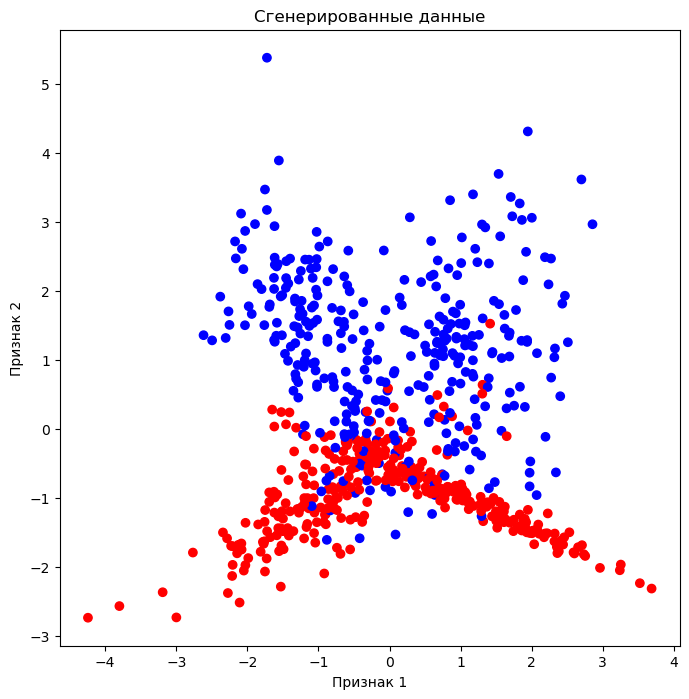

In [85]:
# Генерируем данные по примеру : 500 образцов, 2 признака, 2 информативных признака, 2 класса.
classes = datasets.make_classification(n_samples=700, 
                                        n_features=2, 
                                        n_informative=2, 
                                        n_redundant=0, 
                                        n_classes=2, 
                                        random_state=1)
X, y = classes

# Визуализируем сгенерированные данные
colors = ListedColormap(['red', 'blue'])
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)
plt.title('Сгенерированные данные')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

# Для учета свободного члена (интерсепта) добавим столбец единиц в X
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))


In [86]:
np.random.seed(12) # это число позволяет постоянно получать одну и ту же "случайность"
shuffle_index = np.random.permutation(classes[0].shape[0]) #создает случайную перестановку индексов от 0 до 99 (так как у нас 100 samples)

X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index] #Затем мы используем эти перемешанные индексы для перестановки строк в данных (classes[0]) и меток (classes[1])

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (489, 2)
Размер массива признаков тестовой выборки (211, 2)
Размер массива ответов для обучающей выборки (489,)
Размер массива ответов для тестовой выборки (211,)


In [95]:
X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

X_train_tr = X_train_bias

In [96]:
np.random.seed(42)
w_init = np.random.randn(X_bias.shape[1])
n_iterations = 1000
eta = 0.05

# Обучаем модель
w, losses = optimize(w_init, X_train_tr, y_train, n_iterations, eta)

y_predicted_test = predict(w, X_test_tr)
y_predicted_train = predict(w, X_train_tr)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [0.43411196 0.27809711 2.46304584]
Точность на обучающей выборке: 88.548
Точность на тестовой выборке: 90.521


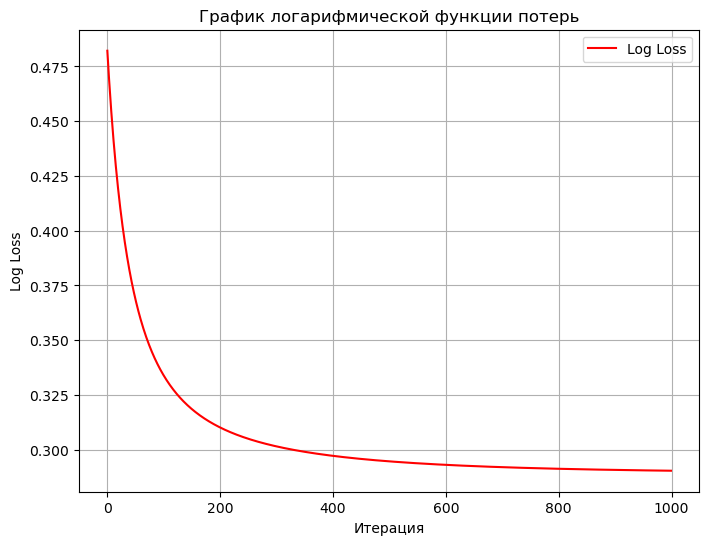

In [97]:
# Инициализируем начальный вектор весов
# Визуализация изменения функции потерь
plt.figure(figsize=(8, 6))
plt.plot(losses, label="Log Loss", color='red')
plt.xlabel('Итерация')
plt.ylabel('Log Loss')
plt.title('График логарифмической функции потерь')
plt.legend()
plt.grid(True)
plt.show()

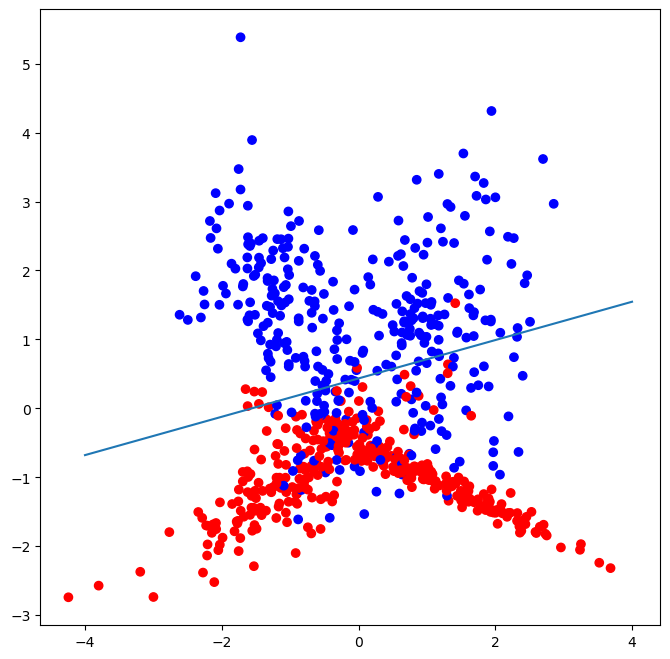

In [98]:
#Визуализируем результат и функцию потерь:
data = np.linspace(-4, 4, 700)

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.plot(data, w[1] * data + w[0])

plt.show()

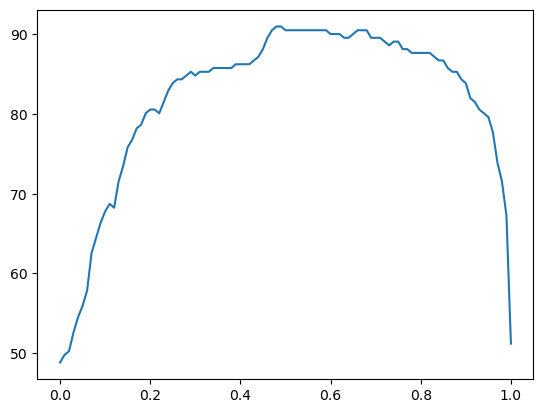

In [99]:
#В завершение подберем различные значения порога для определения точности:
test_acc = []
b_l = []

for b in range(0, 101):
  y_predicted_test = predict(w, X_test_tr, b/100)
  y_predicted_train = predict(w, X_train_tr, b/100)

  # В качестве меры точности возьмем долю правильных ответов

  test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test)*100.0)

  b_l.append(b/100)
  test_acc.append(test_accuracy)

plt.plot(b_l, test_acc)
plt.show()